## ESTUDIO DE DATOS SOBRE EL ALQUILER DE PISOS VACACIONALES EN NUEVA YORK

#### El objetivo de este Notebook es encontrar relaciones entre las distintas variables que conforman el dataset y extraer distintas conclusiones que ayuden a analizar los factores que afectan al precio de los alquileres, así como distintas estadísticas que nos ayuden a tener un mayor conocimiento de cómo se comporta el sector del alquiler turístico privado en el estado de Nueva York.

#### El dataset recoge los datos de Airbnb relativos al tramo de años 2008 - 2019. Fuente: Kaggle

#### Importamos las librerías que vamos a emplear:

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium



#### Importamos el archivo y los convertimos a un Dataframe de Pandas y observamos el nº de datos que contiene por cada una de las columnas:

In [53]:
raw_ny_df = pd.read_csv("C:/Users/rubrn/Documents/PROYECTOS DATOS/NY/AB_NYC_2019.csv", encoding="latin1", delimiter=";")

raw_ny_df.count()


id                                48629
name                              48613
host_id                           48629
host_name                         48608
neighbourhood_group               48629
neighbourhood                     48629
latitude                          48629
longitude                         48629
latitude_room                     48629
longitude_room                    48629
room_type                         48629
price                             48629
minimum_nights                    48629
number_of_reviews                 48629
last_review                       38614
reviews_per_month                 38614
calculated_host_listings_count    48629
availability_365                  48629
dtype: int64

#### Breve resumen de los principales estadísticos del dataset que nos permite identificar posibles outliers o valores que, por estar demasiado alejados del resto, pueden interferir de forma negativa en el modelo y que éste no refleje una imagen fiel de la realidad:



In [36]:
raw_ny_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.862900e+04,48629.000000,48629.000000,48629.000000,48629.000000,48629.000000,38614.000000,48629.000000,48629.000000
mean,6.746494e+07,40.719659,-73.940678,152.756647,7.042218,23.225298,1.368547,7.167575,112.566329
std,7.855696e+07,0.070254,0.043177,238.815155,20.550707,44.545117,1.677436,33.039147,131.610137
min,2.438000e+03,40.562330,-74.139860,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.795299e+06,40.650100,-73.959720,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.065875e+07,40.681490,-73.949580,107.000000,3.000000,5.000000,0.710000,1.000000,44.000000
75%,1.074344e+08,40.790280,-73.949580,175.000000,5.000000,23.000000,2.010000,2.000000,226.000000
max,2.743213e+08,40.849850,-73.836520,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### En el caso de la columna "minimum_nights", no parece muy lógico que el valor sea se 1250 noches. Esta idea se refuerza aún más con la información que aporta el cuartil 3, en el cual podemos ver que en un 75% de los casos el valor para esta columna es 5 o inferior. 

#### Otro de los valores que pueden afectar de forma negativa es el relativo al precio máximo. Si tenemos en cuenta que la media se sitúa en 152 dólares y que el 75% de los precios pisos tienen, como máximo, un precio de 175 dólares, lo más adecueado es prescindir del piso que tiene como precio máximo 10.000 dólares.

#### El nº de registros que tienen un precio superior a 1000 dólares es de 237. Es decir, un 0,48% del total del Dataset. Se tratan, por tanto, de muy pocos registros con unos valores que difieren mucho del resto, y que debemos evitar si queremos conseguir un modelo que se adecúe a la realidad lo máximo posible:

In [37]:
raw_ny_df[raw_ny_df["price"]>1000].count()

id                                237
name                              237
host_id                           237
host_name                         237
neighbourhood_group               237
neighbourhood                     237
latitude                          237
longitude                         237
room_type                         237
price                             237
minimum_nights                    237
number_of_reviews                 237
last_review                       107
reviews_per_month                 107
calculated_host_listings_count    237
availability_365                  237
dtype: int64

#### Lo mismo ocurre con el nº de registros que tienen como valor una cifra superior a 75 noches como límite mínimo de estancia:

In [6]:
raw_ny_df[raw_ny_df["minimum_nights"]>75].count()

id                                312
name                              311
host_id                           312
host_name                         312
neighbourhood_group               312
neighbourhood                     312
latitude                          312
longitude                         312
room_type                         312
price                             312
minimum_nights                    312
number_of_reviews                 312
last_review                       156
reviews_per_month                 156
calculated_host_listings_count    312
availability_365                  312
dtype: int64

#### Eliminamos los outliers y comprobamos que los estadísticos ahora tienen mayor sentido:

In [7]:
raw_ny_df = raw_ny_df[raw_ny_df["price"]<1000] 

raw_ny_df = raw_ny_df[raw_ny_df["minimum_nights"]<75] 

In [8]:
raw_ny_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.803200e+04,48032.000000,48032.000000,48032.000000,48032.000000,48032.000000,38322.000000,48032.000000,48032.000000
mean,6.760305e+07,40.728856,-73.419218,140.381870,5.906479,23.404335,1.374354,7.179838,111.625604
std,7.859714e+07,0.054544,0.285344,113.066872,8.941085,44.701152,1.680725,33.114550,131.132066
min,2.438000e+03,40.499790,-74.442444,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.849108e+06,40.689960,-73.339829,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.083785e+07,40.722880,-73.339556,105.000000,2.000000,5.000000,0.720000,1.000000,43.000000
75%,1.074344e+08,40.763100,-73.339362,175.000000,5.000000,24.000000,2.020000,2.000000,223.000000
max,2.743213e+08,40.913060,-73.337130,999.000000,74.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
raw_ny_df.count()

id                                48032
name                              48017
host_id                           48032
host_name                         48011
neighbourhood_group               48032
neighbourhood                     48032
latitude                          48032
longitude                         48032
room_type                         48032
price                             48032
minimum_nights                    48032
number_of_reviews                 48032
last_review                       38322
reviews_per_month                 38322
calculated_host_listings_count    48032
availability_365                  48032
dtype: int64

#### El siguiente paso consiste en sustituir aquellas columnas que están vacías (NaN) por ceros, entendiendo que el hecho de que esos registros no aporten información es porque no han tenido ninguna "review":

In [10]:
raw_ny_df["last_review"] = raw_ny_df["last_review"].fillna(0)
raw_ny_df["reviews_per_month"] = raw_ny_df["reviews_per_month"].fillna(0)


In [11]:
raw_ny_df.count()

id                                48032
name                              48017
host_id                           48032
host_name                         48011
neighbourhood_group               48032
neighbourhood                     48032
latitude                          48032
longitude                         48032
room_type                         48032
price                             48032
minimum_nights                    48032
number_of_reviews                 48032
last_review                       48032
reviews_per_month                 48032
calculated_host_listings_count    48032
availability_365                  48032
dtype: int64

#### En el sigiente paso vamos a verificar cómo afecta el tanto el barrio como el tipo de alojamiento al precio del alquiler. Podemos que Manhattan es el barrio más caro a la hora de buscar alquiler y un casa entera sería el tipo de alojamiento con el precio  más elevado:



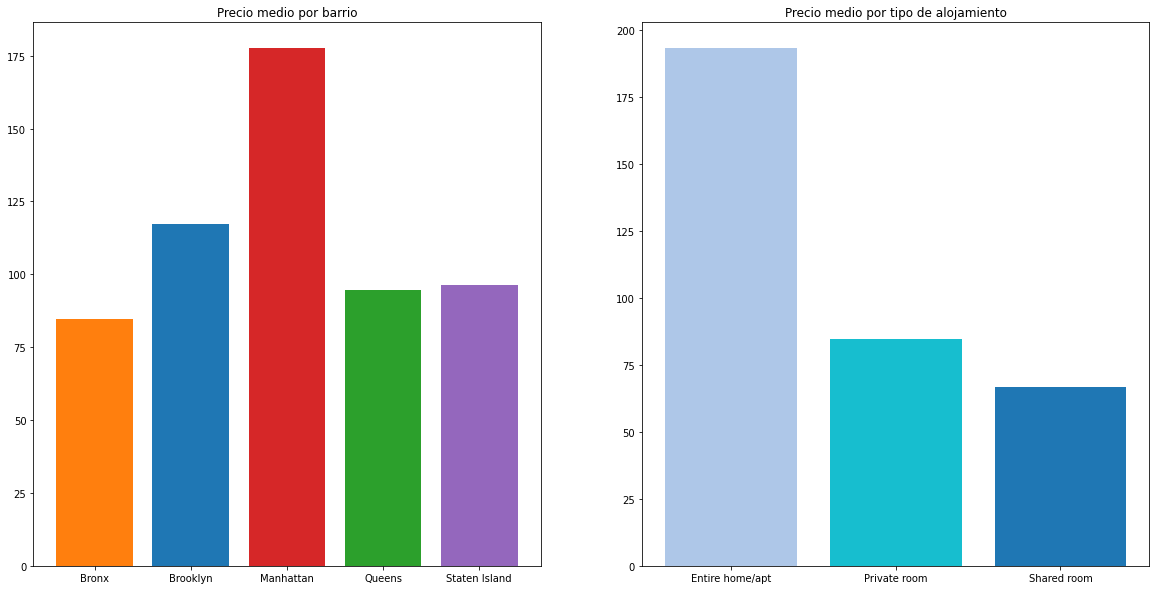

,price
neighbourhood_group,
Bronx,84.754930
Brooklyn,117.201068
Manhattan,177.635094
Queens,94.753954
Staten Island,96.200000


,price
room_type,
Entire home/apt,193.190185
Private room,84.607114
Shared room,66.552212


NameError: name 'fig' is not defined

In [12]:
raw_ny_df["neighbourhood_group"].unique()
raw_ny_df["room_type"].unique()

x1 =['Bronx', 'Brooklyn', 'Manhattan','Queens', 'Staten Island']
x2 =['Entire home/apt','Private room', 'Shared room']

y1 = raw_ny_df.groupby(by="neighbourhood_group").mean().price
y2 = raw_ny_df.groupby(by="room_type").mean().price
width=0.8

neighbourhood_colors = [(255/255, 127/255, 14/255),(31/255, 119/255, 180/255),(214/255, 39/255, 40/255),
                        (44/255, 160/255, 44/255),(148/255, 103/255, 189/255)]

room_colors = [(174/255, 199/255, 232/255),(23/255, 190/255, 207/255),(31/255, 119/255, 180/255)]

plt.figure(figsize=(20,10))

ax1=plt.subplot(1, 2, 1)
ax2=plt.subplot(1, 2, 2)

ax1.bar(x1,y1,width, color = neighbourhood_colors)
ax1.set_title("Precio medio por barrio")

ax2.bar(x2,y2,width, color = room_colors)
ax2.set_title("Precio medio por tipo de alojamiento")

plt.show()

df_barrios = raw_ny_df.groupby(["neighbourhood_group"]).agg({"price":"mean"})
df_rooms = raw_ny_df.groupby(["room_type"]).agg({"price":"mean"})

display(df_barrios)
display(df_rooms)

fig.show()

#### Por último, y combinando la información de los gráficos anteriores, a continuación podemos observar cómo se comporta el precio medio del alquiler aglutinando ambas variables: Barrio y tipo de vivienda:

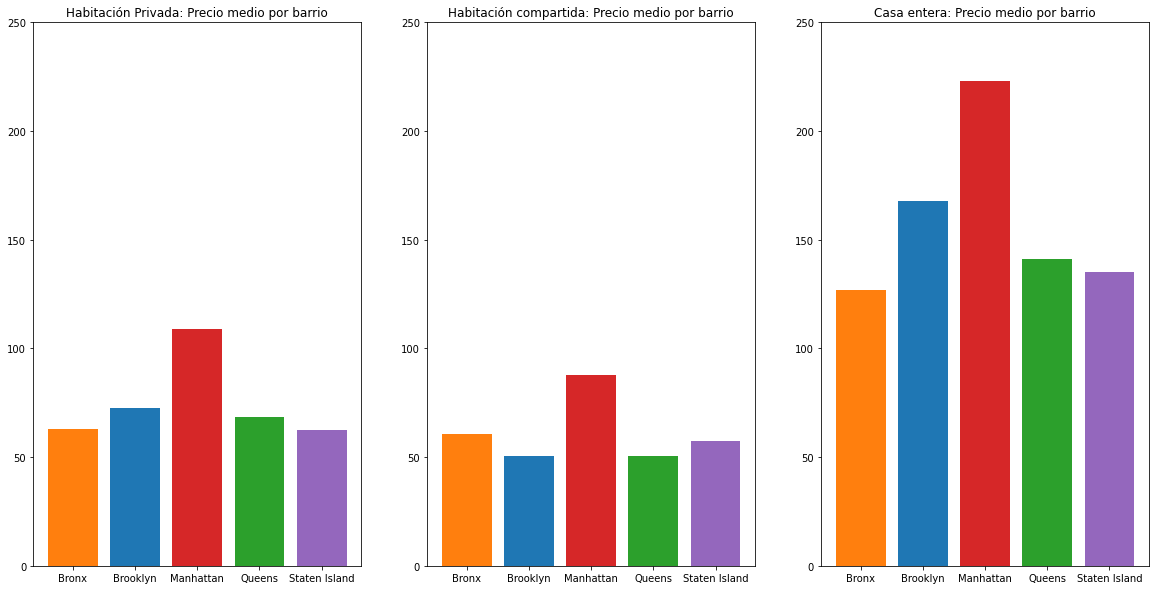

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,126.654795,63.138846,60.389831
Brooklyn,167.715212,72.565846,50.411192
Manhattan,222.859955,109.100928,87.833689
Queens,141.109443,68.317456,50.609890
Staten Island,135.129412,62.494624,57.444444


In [13]:
x=['Bronx', 'Brooklyn', 'Manhattan','Queens', 'Staten Island']

y1=raw_ny_df[raw_ny_df["room_type"]=="Private room"].groupby(by="neighbourhood_group").mean().price
y2=raw_ny_df[raw_ny_df["room_type"]=="Shared room"].groupby(by="neighbourhood_group").mean().price
y3=raw_ny_df[raw_ny_df["room_type"]=="Entire home/apt"].groupby(by="neighbourhood_group").mean().price


width=0.8

fig, ax = plt.subplots(figsize=(20,10))

ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2)
ax3=plt.subplot(1 ,3, 3)

ax1.bar(x,y1,width, color= neighbourhood_colors)
ax1.set_title("Habitación Privada: Precio medio por barrio")
ax1.set_ylim(0,250)

ax2.bar(x,y2,width, color = neighbourhood_colors)
ax2.set_title("Habitación compartida: Precio medio por barrio")
ax2.set_ylim(0,250)

ax3.bar(x,y3,width, color = neighbourhood_colors)
ax3.set_title("Casa entera: Precio medio por barrio")
ax3.set_ylim(0,250)

plt.show()

df_n_roomtype = raw_ny_df.groupby(['neighbourhood_group','room_type']).agg({'price':'mean'})
df_n_roomtype = pd.pivot_table(df_n_roomtype, values="price",index=['neighbourhood_group'], columns=['room_type'])
df_n_roomtype


#### Otro aspecto interesane a analizar es cómo se distribuye el total de los precios de los alquileres por cada uno de los barrios. Se puede observar a simple vista como existe una relación entre esta variable y el nº de alojamientos (id) disponibles en cada uno de los barrios. Esto significa, por tanto, que el hecho de que ciertos barrios se vean beneficiados de mayores ingresos relativos a Airbnb no se deriva solo de que los precios sean superiores si no que, además de eso, el nº de viviendas ofertadas también es superior:

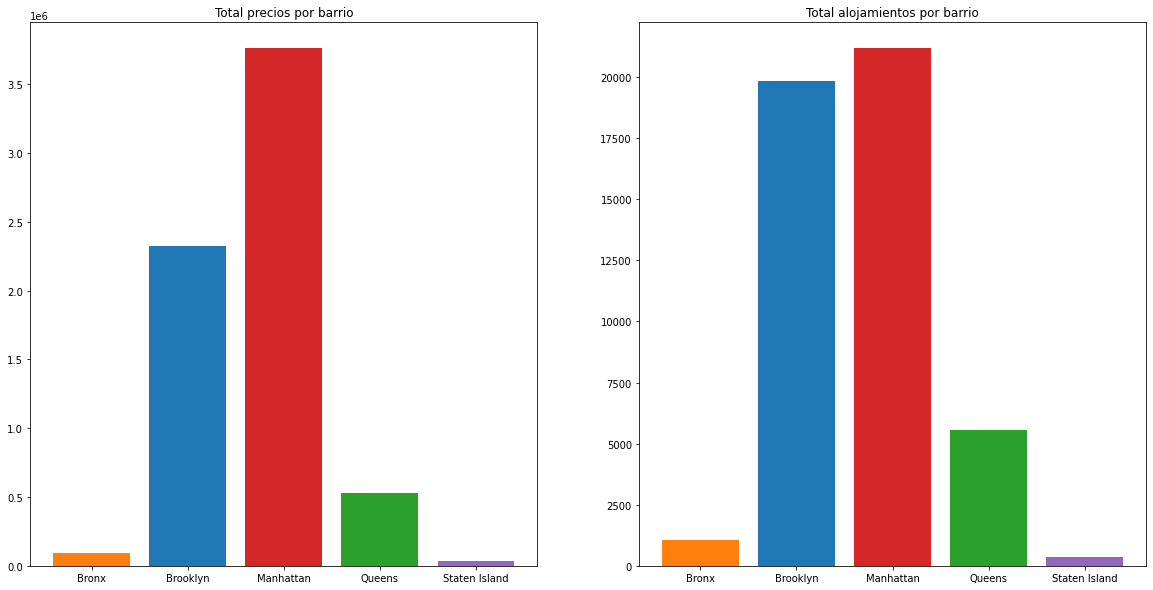

,price
neighbourhood_group,
Bronx,90264
Brooklyn,2326324
Manhattan,3763910
Queens,527211
Staten Island,35113


,id
neighbourhood_group,
Bronx,1065
Brooklyn,19849
Manhattan,21189
Queens,5564
Staten Island,365


In [14]:
x =['Bronx', 'Brooklyn', 'Manhattan','Queens', 'Staten Island']
y = raw_ny_df.groupby(by="neighbourhood_group").sum().price
y2 = raw_ny_df.groupby(by="neighbourhood_group").count().id

fig, ax = plt.subplots(figsize=(20,10))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(x,y,width, color = neighbourhood_colors)
ax2.bar(x,y2,width, color = neighbourhood_colors)

ax1.set_title("Total precios por barrio")
ax2.set_title("Total alojamientos por barrio")

plt.show()

df_sum_barrios = raw_ny_df.groupby("neighbourhood_group").agg({"price":"sum"})
df_count_barrios = raw_ny_df.groupby("neighbourhood_group").agg({"id":"count"})

display(df_sum_barrios)
display(df_count_barrios)

#### En el siguiente mapa de calor el objetivo obtener una visión del nivel de correlación entre las distintas variables que afectan al precio de los apartamentos y, de esta manera, poder encontrar un modelo que nos ayude a predecir un posible precio a partir de la variable correlacionada:

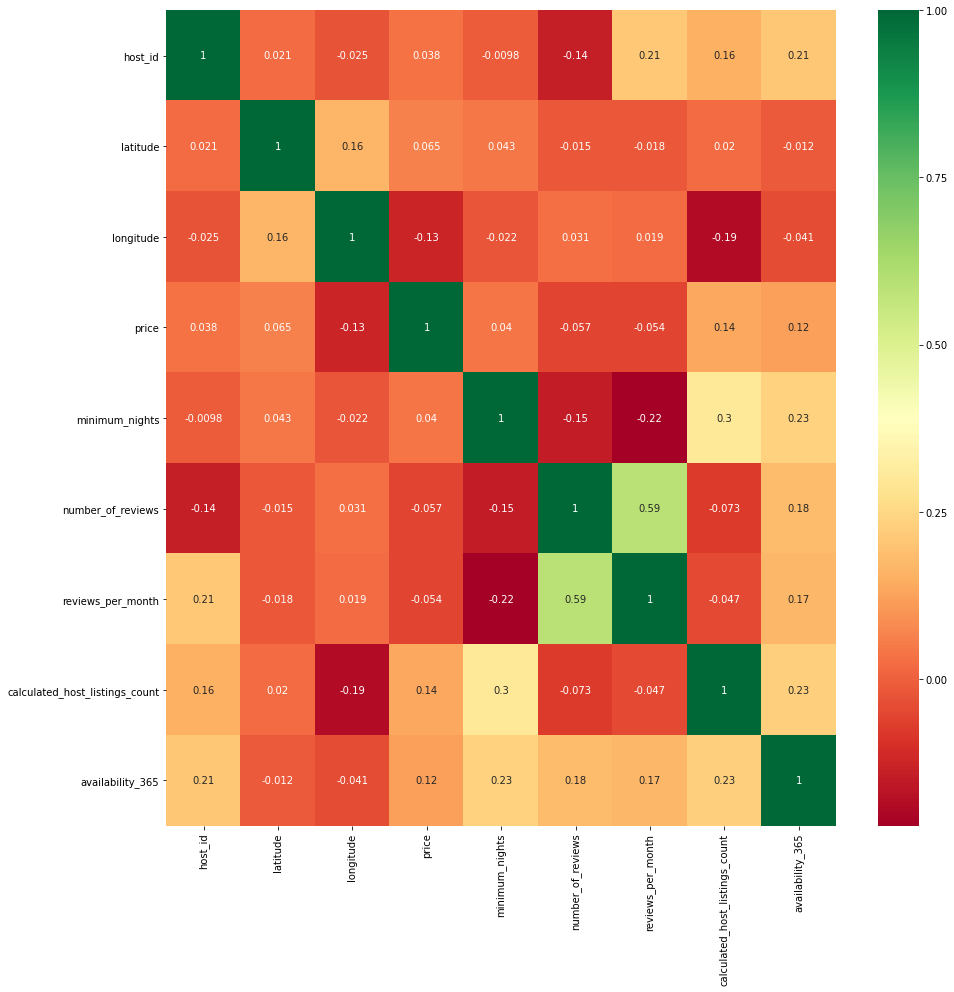

In [15]:
corrmat = raw_ny_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))

hmap = sns.heatmap(raw_ny_df[top_corr_features].corr(), annot = True, cmap="RdYlGn")


#### Como se puede observar en la matriz de correlación, no hay ninguna variable que, de forma aislada, se correlacione lo suficientemente con el precio de los alquileres (valores cercanos a 1).

#### Para finalizar, obtenemos un mapa interactivo del estado de Nueva York en el que podemos ver la distribución física de los alojamientos. El radio de sus circunferencias se corresponde con el precio que éstos tienen.

In [77]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

for index, row in raw_ny_df[1:2000].iterrows():
    
    
    price = row["price"]
    if row["neighbourhood_group"] == "Manhattan":
        color = "#fc0818"
    elif row["neighbourhood_group"] == "Brooklyn":
        color = "#0511f7"
    elif row["neighbourhood_group"] == "Staten Island":
        color = "#af08fc"
    elif row["neighbourhood_group"] == "Bronx":
        color = "#fc9e08"
    elif row["neighbourhood_group"] == "Queens":
        color = "#0af712"
        
    folium.CircleMarker(location = (row["latitude_room"],
                                    row["longitude_room"]),
                       radius = price/100,
                       color = color,
                       fill = True).add_to(folium_map)


In [78]:
folium_map